In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv("train_feature.csv", index_col='id')
dataset.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,avg_orders_13week_across,avg_orders_26week_across,avg_orders_52week_across,avg_orders_13week_adj_across,avg_orders_26week_adj_across,discount,year,month,quarter,week_in_month
id,,,,,,,,,,,,,,,,,,,,,
1379560,177,1,55,1885,136.83,152.29,0,0,647,56,...,726.506494,726.506494,726.506494,NaN,NaN,0.101517,1,1,1,1
1466964,270,1,55,1993,136.83,135.83,0,0,647,56,...,793.896104,793.896104,793.896104,NaN,NaN,-0.007362,1,1,1,1
1346989,189,1,55,2539,134.86,135.86,0,0,647,56,...,272.116883,272.116883,272.116883,NaN,NaN,0.007361,1,1,1,1
1338232,54,1,55,2139,339.50,437.53,0,0,647,56,...,49.709677,49.709677,49.709677,NaN,NaN,0.224053,1,1,1,1
1448490,40,1,55,2631,243.50,242.50,0,0,647,56,...,74.014085,74.014085,74.014085,NaN,NaN,-0.004124,1,1,1,1


In [7]:
categorical_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 
                       'region_code', 'center_type', 'category', 'cuisine','year','month','week_in_month', 'quarter']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 1379560 to 1361984
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   num_orders                    456548 non-null  int64   
 1   week                          456548 non-null  category
 2   center_id                     456548 non-null  category
 3   meal_id                       456548 non-null  category
 4   checkout_price                456548 non-null  float64 
 5   base_price                    456548 non-null  float64 
 6   emailer_for_promotion         456548 non-null  category
 7   homepage_featured             456548 non-null  category
 8   city_code                     456548 non-null  category
 9   region_code                   456548 non-null  category
 10  center_type                   456548 non-null  category
 11  op_area                       456548 non-null  float64 
 12  category               

In [8]:
correlation = dataset.corr()
correlation

,num_orders,checkout_price,base_price,op_area,mean_base_price,avg_orders_13week,avg_orders_26week,avg_orders_52week,avg_orders_13week_adj,avg_orders_26week_adj,avg_orders_13week_across,avg_orders_26week_across,avg_orders_52week_across,avg_orders_13week_adj_across,avg_orders_26week_adj_across,discount
num_orders,1.000000,-0.282108,-0.222306,0.176976,-0.232571,0.756832,0.737665,0.732134,0.673540,0.683755,0.566346,0.551851,0.549713,0.494366,0.503139,0.161900
checkout_price,-0.282108,1.000000,0.953389,0.021569,0.948152,-0.288132,-0.291632,-0.297826,-0.273262,-0.281528,-0.394371,-0.398821,-0.404876,-0.376117,-0.385883,-0.281215
base_price,-0.222306,0.953389,1.000000,0.018031,0.986845,-0.288508,-0.295824,-0.303439,-0.286354,-0.293892,-0.393701,-0.402686,-0.410488,-0.390527,-0.399376,-0.056287
op_area,0.176976,0.021569,0.018031,1.000000,0.020256,0.227814,0.231416,0.232058,0.225468,0.228815,-0.057606,-0.058530,-0.058776,-0.057015,-0.057852,0.000572
mean_base_price,-0.232571,0.948152,0.986845,0.020256,1.000000,-0.303881,-0.312461,-0.320488,-0.304761,-0.312837,-0.413209,-0.423458,-0.431617,-0.413077,-0.422445,0.007261
avg_orders_13week,0.756832,-0.288132,-0.288508,0.227814,-0.303881,1.000000,0.975211,0.959128,0.909107,0.906696,0.750934,0.731412,0.721023,0.672629,0.672369,-0.042415
avg_orders_26week,0.737665,-0.291632,-0.295824,0.231416,-0.312461,0.975211,1.000000,0.985258,0.963397,0.961057,0.733994,0.753687,0.743097,0.717358,0.716627,-0.061453
avg_orders_52week,0.732134,-0.297826,-0.303439,0.232058,-0.320488,0.959128,0.985258,1.000000,0.945956,0.969241,0.727912,0.747439,0.758297,0.708915,0.727026,-0.067993
avg_orders_13week_adj,0.673540,-0.273262,-0.286354,0.225468,-0.304761,0.909107,0.963397,0.945956,1.000000,0.974758,0.678954,0.721597,0.708403,0.752246,0.732249,-0.099552
avg_orders_26week_adj,0.683755,-0.281528,-0.293892,0.228815,-0.312837,0.906696,0.961057,0.969241,0.974758,1.000000,0.681306,0.723485,0.729340,0.734878,0.755120,-0.100582


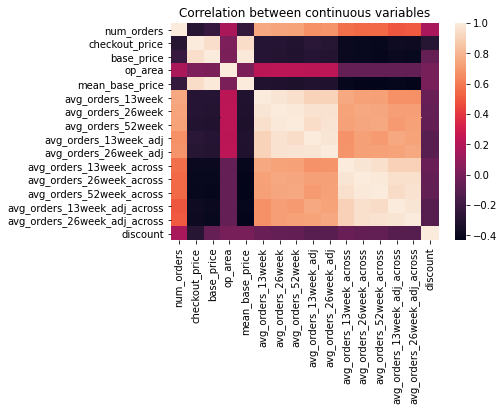

In [12]:
_ = sns.heatmap(correlation)
_ = plt.title("Correlation between continuous variables")
plt.savefig('figures/correlation.jpg', bbox_inches="tight")
plt.show()

Checkout price & base price has high positive correlation with each other & negative correlation with number of orders. Makes sense, because customer orders cheaper meals than costly meals.

Op area & discount has low positive correlation with other variables.

In [13]:
# Function to draw samples, it will be used in performing tests
def draw_samples(series, statistic=np.mean, replicas=10000):
    size = series.shape[0]
    sample_data = [statistic(series.sample(n=size, replace=True)) for _ in range(replicas)]
    return np.array(sample_data)

In [14]:
promotion = dataset['emailer_for_promotion'].astype('int') + dataset['homepage_featured'].astype('int')
promotion.value_counts()

0    388874
1     48443
2     19231
dtype: int64

In the dataset, there are two types of promotional activity, viz. promotion by emails and promotion in homepage of website. Sometimes both activities were performed but most of the time any one was performed. Due to this, below questions are raised:

1) Does promotion by email results in increase in number of orders ?
2) Does promotion in homepage results in increase in number of orders ?
3) Since, there are activity in any one way, which promotional activity has higher impact on number of orders?


### Promotion Activity

##### Does promotion by email results in increase in number of orders ?

Null Hypothesis: The difference between the mean of number of orders with email promotion and without email promotion is less than or equal to zero.

Alternate Hypothesis: The difference between the mean of number of orders with email promotion and without email promotion is greater than zero.

Observed mean difference: 401.83466060394824
Confidence Intervals: [394.30267789]
P-value: 0.0


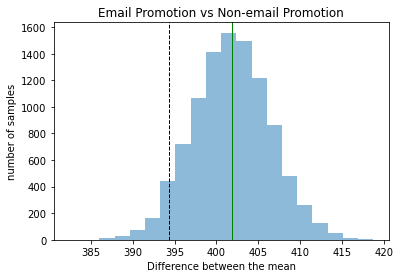

In [19]:
emailer_orders = dataset[dataset.emailer_for_promotion == 1]['num_orders']
non_emailer_orders = dataset[dataset.emailer_for_promotion == 0]['num_orders']

observed_mean_diff = emailer_orders.mean() - non_emailer_orders.mean()
mean_diff_bootstrap = draw_samples(emailer_orders) - draw_samples(non_emailer_orders)

confidence_interval = np.percentile(mean_diff_bootstrap, [5.0])
p_value = np.sum(mean_diff_bootstrap <= 0)/ len(mean_diff_bootstrap)

print("Observed mean difference: {}".format(observed_mean_diff))
print("Confidence Intervals: {}".format(confidence_interval))
print("P-value: {}".format(p_value))

# Plotting histogram
_ = plt.hist(mean_diff_bootstrap, bins=20, alpha=0.5)
_ = plt.xlabel("Difference between the mean")
_ = plt.ylabel("number of samples")
_ = plt.title("Email Promotion vs Non-email Promotion")

# Marking the 5% confidence interval
_ = plt.axvline(confidence_interval[0], color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(observed_mean_diff, color='g', linewidth=1)

plt.savefig('figures/diff_orders_email_promotion.jpg')
plt.show()

Observed mean difference of above hypothesis test is statistically significant for positive value. Hence, we reject the null hypothesis and accept the alternative hypothesis.

The above Histogram also supports alternate hypothesis.

Conclusion: Promotion Activity by emails does increase the number of orders

##### Does promotion in homepage results in increase in number of orders ?

Null Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is less than or equal to zero.

Alternate Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is greater than zero.

Observed mean difference: 373.8347456767344
Confidence Intervals: [367.98493504]
P-value: 0.0


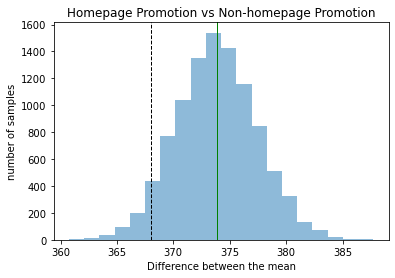

In [20]:
homepage_orders = dataset[dataset.homepage_featured == 1]['num_orders']
non_homepage_orders = dataset[dataset.homepage_featured == 0]['num_orders']

observed_mean_diff = homepage_orders.mean() - non_homepage_orders.mean()
mean_diff_bootstrap = draw_samples(homepage_orders) - draw_samples(non_homepage_orders)

confidence_interval = np.percentile(mean_diff_bootstrap, [5.0])
p_value = np.sum(mean_diff_bootstrap <= 0)/ len(mean_diff_bootstrap)

print("Observed mean difference: {}".format(observed_mean_diff))
print("Confidence Intervals: {}".format(confidence_interval))
print("P-value: {}".format(p_value))

# Plotting histogram
_ = plt.hist(mean_diff_bootstrap, bins=20, alpha=0.5)
_ = plt.xlabel("Difference between the mean")
_ = plt.ylabel("number of samples")
_ = plt.title("Homepage Promotion vs Non-homepage Promotion")

# Marking the 5% confidence interval
_ = plt.axvline(confidence_interval[0], color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(observed_mean_diff, color='g', linewidth=1)

plt.savefig('figures/diff_orders_homepage_promotion.jpg')
plt.show()

Observed mean difference of above hypothesis test is statistically significant for positive value. Hence, we reject the null hypothesis and accept the alternative hypothesis.

The above Histogram also supports alternate hypothesis.

Conclusion: Promotion Activity in homepage does increase the number of orders

##### Which promotional activity has higher impact on number of orders?]

Null Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is less than or equal to zero.

Alternate Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is greater than zero.

Observed mean difference: 24.59858319570185
Confidence Intervals: [14.61780198]
P-value: 0.0002


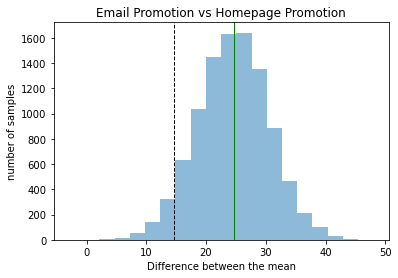

In [22]:
either_activity = dataset[promotion == 1]

homepage_orders = either_activity[either_activity.homepage_featured == 1]['num_orders']
non_homepage_orders = either_activity[either_activity.homepage_featured == 0]['num_orders']

observed_mean_diff = homepage_orders.mean() - non_homepage_orders.mean()
mean_diff_bootstrap = draw_samples(homepage_orders) - draw_samples(non_homepage_orders)

confidence_interval = np.percentile(mean_diff_bootstrap, [5.0])
p_value = np.sum(mean_diff_bootstrap <= 0)/ len(mean_diff_bootstrap)

print("Observed mean difference: {}".format(observed_mean_diff))
print("Confidence Intervals: {}".format(confidence_interval))
print("P-value: {}".format(p_value))

# Plotting histogram
_ = plt.hist(mean_diff_bootstrap, bins=20, alpha=0.5)
_ = plt.xlabel("Difference between the mean")
_ = plt.ylabel("number of samples")
_ = plt.title("Email Promotion vs Homepage Promotion")

# Marking the 5% confidence interval
_ = plt.axvline(confidence_interval[0], color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(observed_mean_diff, color='g', linewidth=1)

plt.savefig('figures/impact_homepage_vs_email.jpg')
plt.show()

Observed mean difference of above hypothesis test is statistically significant for positive value. Hence, we reject the null hypothesis and accept the alternative hypothesis.

The above Histogram also supports alternate hypothesis.

Conclusion: Promotion Activity in homepage has more impact than emails on increase in number of orders

Note: This is only in case were there is any one activity.

##### Summary:
1) The checkout price and base price has high positive correlation with each other

2) They also have negative correlation with number of orders

3) The operating area and discount has low positive correlation with other variables

4) Promotion Activity by emails does increase the number of orders

5) Promotion Activity in homepage does increase the number of orders

6) But Promotion activity in homepage has more impact than emails on increase in number of orders

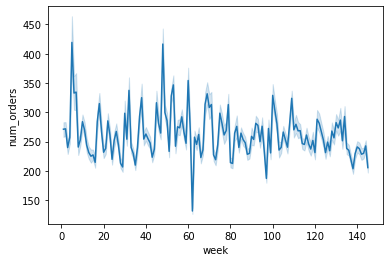

In [46]:
sns.lineplot(dataset['week'],dataset['num_orders'])

There were maximum orders in week 48 and 5 and minimum orders in week 62. These raises below questions:

What went good in week 48 and 5 ?
What went wrong in week 62 ?
Compare week 62 and week 48
Let's compare the distribution of num_orders

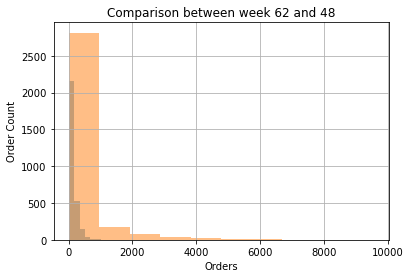

In [44]:
dataset_week_62 = dataset[dataset.week == 62]
dataset_week_48 = dataset[dataset.week == 48]

dataset_week_62.num_orders.hist(alpha=0.5)
dataset_week_48.num_orders.hist(alpha=0.5)
_ = plt.xlabel('Orders')
_ = plt.ylabel('Order Count')
_ = plt.title('Comparison between week 62 and 48')

plt.savefig('figures/orders_distribution_week_62_vs_48.jpg')
plt.show()

Huge difference between distribution

In [26]:
dataset_week_62.emailer_for_promotion.value_counts()


0    2715
1     175
Name: emailer_for_promotion, dtype: int64

In [27]:
dataset_week_48.emailer_for_promotion.value_counts()

0    2729
1     401
Name: emailer_for_promotion, dtype: int64

In [28]:
dataset[dataset.week == 5].emailer_for_promotion.value_counts()

0    2522
1     337
Name: emailer_for_promotion, dtype: int64

There were almost double promotional activity, by email, in week 48 and week 5 as compare to week 62. Hence, there is hugh difference in number of orders.

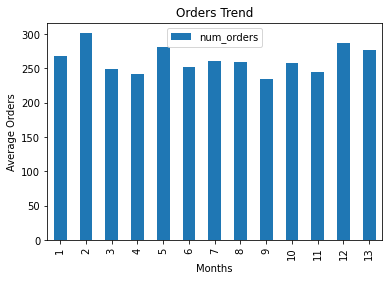

In [43]:
month_trend = dataset[['month', 'num_orders']].groupby('month').mean()

month_trend.reset_index().plot('month', 'num_orders', kind='bar')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Months")
_ = plt.ylabel("Average Orders")

plt.savefig('figures/orders_distribution_monthly.jpg')
plt.show()

Month 2 has highest orders while Month 9 has lowest orders

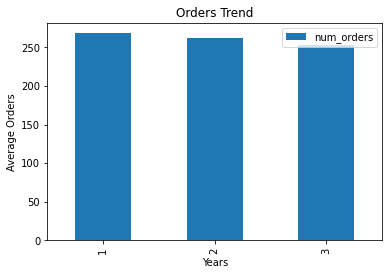

In [31]:
year_trend = dataset[['year', 'num_orders']].groupby('year').mean()

year_trend.reset_index().plot('year', 'num_orders', kind='bar')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Years")
_ = plt.ylabel("Average Orders")
plt.show()

 we cannot conclude anything from year because we have only 3 years of data and that too 3rd year is incomplete.

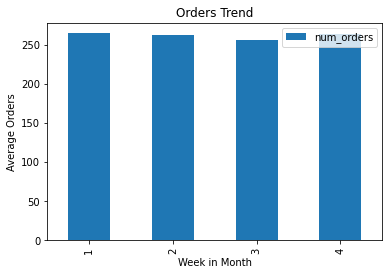

In [42]:
week_in_month_trend = dataset[['week_in_month', 'num_orders']].groupby('week_in_month').mean()

week_in_month_trend.reset_index().plot('week_in_month', 'num_orders', kind='bar')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Week in Month")
_ = plt.ylabel("Average Orders")

plt.savefig('figures/orders_distribution_week_in_month.jpg')
plt.show()

Start and end of the month has more orders than 2nd and 3rd week of the month


##### Trend in Meal


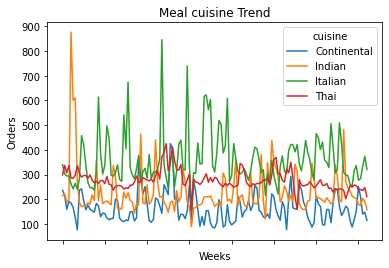

In [34]:
cuisine_trend = dataset.pivot_table(index='week', columns='cuisine', values='num_orders', aggfunc='mean')

cuisine_trend.plot()
_ = plt.title("Meal cuisine Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")

plt.savefig('figures/orders_trend_cuisine.jpg')
plt.show()

Conclusion:
1. Customers really likes Italian meals
2. Continental meals have consistently lower orders as compare to other cuisine
3. There is fluctuations in Indian meals

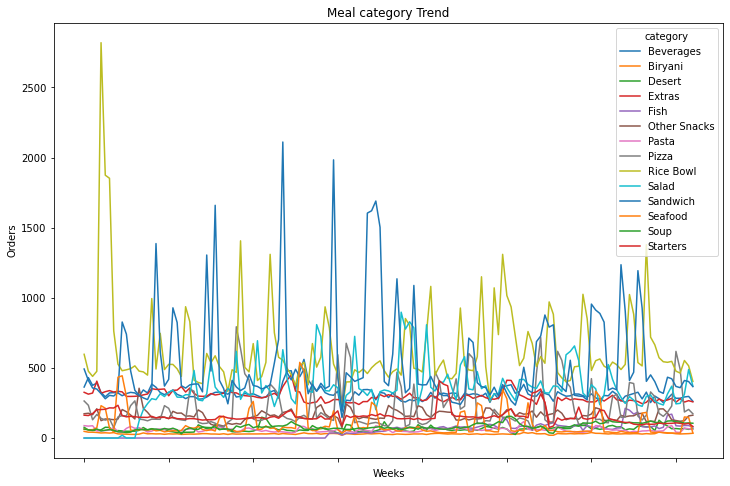

In [36]:
category_trend = dataset.pivot_table(index='week', columns='category', values='num_orders', aggfunc='mean')
category_trend = category_trend.fillna(0)

category_trend.plot(figsize=(12, 8))
_ = plt.title("Meal category Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")

plt.savefig('figures/orders_trend_category.jpg')
plt.show()

Conclusion:
1. Customers mostly orders Beverages
2. Many categories, like Soup, Pizza and Fish, with low orders
3. There is fluctuations in Sandwich and Rice Bowl
4. After week 18, Salad became popular with customers.

##### Trend in Centers

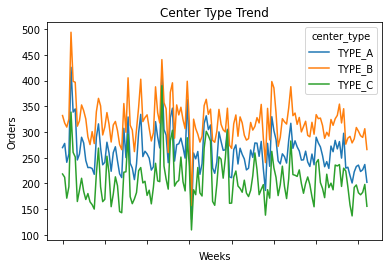

In [37]:
center_type_trend = dataset.pivot_table(index='week', columns='center_type', values='num_orders', 
                                        aggfunc='mean')

center_type_trend.plot()
_ = plt.title("Center Type Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")

plt.savefig('figures/orders_trend_center_type.jpg')
plt.show()

Center type TYPE_B always has more orders than other 2 types

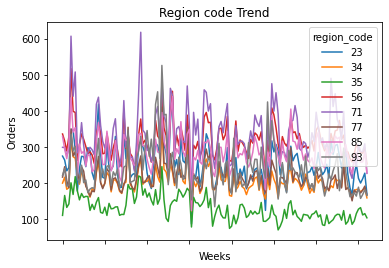

In [40]:
region_code_trend = dataset.pivot_table(index='week', columns='region_code', values='num_orders', 
                                        aggfunc='mean')

region_code_trend.plot()
_ = plt.title("Region code Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")

plt.savefig('figures/orders_trend_region_code.jpg')
plt.show()

Conclusion:
1. Region code 35 has lowest orders
2. There are fluctuations in almost all regions

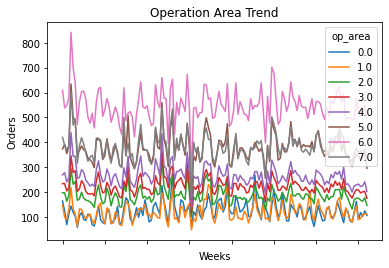

In [41]:
op_area_trend = dataset.copy()
op_area_trend['op_area'] = np.floor(op_area_trend['op_area'])
op_area_trend = op_area_trend.pivot_table(index='week', columns='op_area', values='num_orders', 
                                          aggfunc='mean')

op_area_trend.plot()
_ = plt.title("Operation Area Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")

plt.savefig('figures/orders_trend_op_area.jpg')
plt.show()

Orders has positive correlation with operating area

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

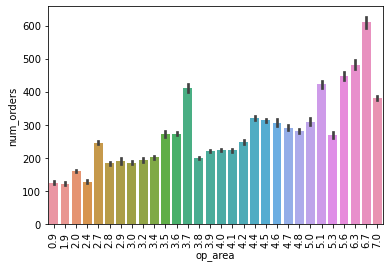

In [47]:
sns.barplot(dataset['op_area'],dataset['num_orders'])
plt.xticks(rotation = '90')

##### Conclusions:
1. Orerational Area number 6.7 has maximum number of orders.
2. Orerational Area number 0.9 has maximum number of orders.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

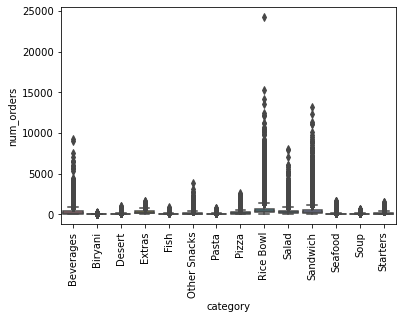

In [48]:
sns.boxplot(x='category',y='num_orders',data=dataset)
plt.xticks(rotation=90)

##### Conclusions:
1. Rice Bowl has the highest demand.
2. Biryani has the lowest demand

##### Summary:
1. There were less orders in week 62 and week high orders in week 48 and week 5 because of emailer promotion activity
2. Month 2 has highest orders while Month 9 has lowest orders
3. Start and end of the month has more orders than 2nd and 3rd week of the month
4. Customers orders Italian meals and Beverages
5. There is fluctuation in orders of Indian meals, Rice Bowl and Sandwich
6. After week 18, Salad gain popularity among customers
7. TYPE_B Centers get more orders than TYPE_A and TYPE_C centers
8. Centers with region code 35 has lowest orders
9. There are fluctuations in almost all regions
10. Orders has positive correlation with operating area
11. Orerational Area number 6.7 has maximum number of orders while Orerational Area number 0.9 has maximum number of orders.
12. Rice Bowl has the highest demand while Biryani has the lowest demand